In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simulate random access with uniform file size

In [116]:
def sim_random_access_eff_uniFileSize(num_files, n_row, n_col):
    pool = np.reshape(np.ones(num_files), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_afPCR_list.append(ds_filter_ra_eff)
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
    ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
    return (ra_eff_bfPCR, ra_eff_afPCR)


In [128]:

(ra_eff_bfPCR_0, ra_eff_afPCR_0) = sim_random_access_eff_uniFileSize(100, 10,10)
(ra_eff_bfPCR_1, ra_eff_afPCR_1) = sim_random_access_eff_uniFileSize(1024, 32,32)
(ra_eff_bfPCR_2, ra_eff_afPCR_2) = sim_random_access_eff_uniFileSize(10000, 100,100)

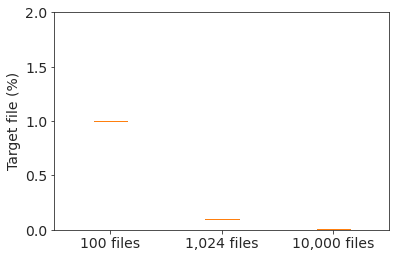

In [129]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_bfPCR_0.flatten(),ra_eff_bfPCR_1.flatten(), ra_eff_bfPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
ax1.set_ylim([0,2.0])
plt.savefig('./fig/fig_uniform_size_bfPCR.png', dpi=300, bbox_inches='tight', format='png')

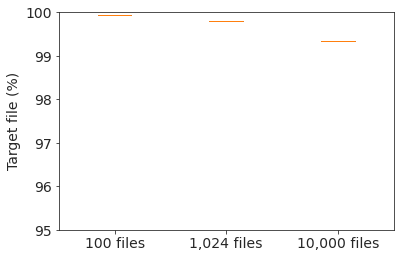

In [131]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_afPCR_0.flatten(),ra_eff_afPCR_1.flatten(), ra_eff_afPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
ax1.set_ylim([95,100])
plt.savefig('./fig/fig_uniform_size_afPCR.png', dpi=300, bbox_inches='tight', format='png')

## Simulate random access with random file size

In [132]:
#np.random.seed(100)
def sim_random_access_eff_ranFileSize(max_file_size, n_row, n_col):
    pool = np.random.randint(low=1, high=max_file_size, size=(n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    #ra_eff_afPCR, ra_eff_bfPCR = [], []
    ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_afPCR_list.append(ds_filter_ra_eff)
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
    ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
    return (ra_eff_bfPCR, ra_eff_afPCR)

In [133]:
max_file_Size = 1000
(ra_eff_bfPCR_0, ra_eff_afPCR_0) = sim_random_access_eff_ranFileSize(max_file_Size, 10,10)
(ra_eff_bfPCR_1, ra_eff_afPCR_1) = sim_random_access_eff_ranFileSize(max_file_Size, 32,32)
(ra_eff_bfPCR_2, ra_eff_afPCR_2) = sim_random_access_eff_ranFileSize(max_file_Size, 100,100)

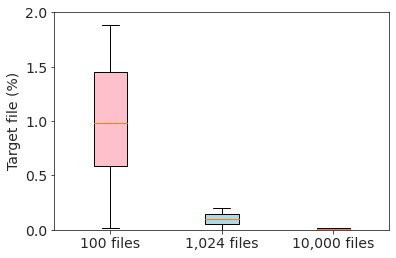

In [134]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_bfPCR_0.flatten(),ra_eff_bfPCR_1.flatten(), ra_eff_bfPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
ax1.set_ylim([0,2.0])
plt.savefig('./fig/fig_different_size_bfPCR_1Xto1000X.png', dpi=300, bbox_inches='tight', format='png')

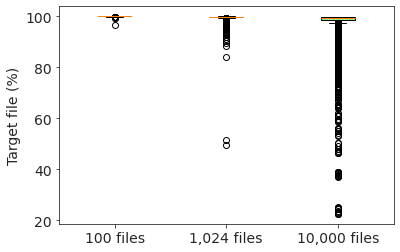

In [135]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_afPCR_0.flatten(),ra_eff_afPCR_1.flatten(), ra_eff_afPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
plt.savefig('./fig/fig_different_size_afPCR_1Xto1000X.png', dpi=300, bbox_inches='tight', format='png')

## Simulate random access with linearly spaced file size

In [136]:
def sim_random_access_eff_linspaceFileSize(max_file_size, pool_size, n_row, n_col):
    pool = np.reshape(np.linspace(1,max_file_size, num=pool_size), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_afPCR_list, ra_eff_bfPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_afPCR_list.append(ds_filter_ra_eff)
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
    ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
    return (ra_eff_bfPCR, ra_eff_afPCR)

In [137]:
max_file_Size = 1000
(ra_eff_bfPCR_0, ra_eff_afPCR_0) = sim_random_access_eff_linspaceFileSize(max_file_size, 100, 10, 10)
(ra_eff_bfPCR_1, ra_eff_afPCR_1) = sim_random_access_eff_linspaceFileSize(max_file_size, 1024, 32, 32)
(ra_eff_bfPCR_2, ra_eff_afPCR_2) = sim_random_access_eff_linspaceFileSize(max_file_size, 10000, 100, 100)

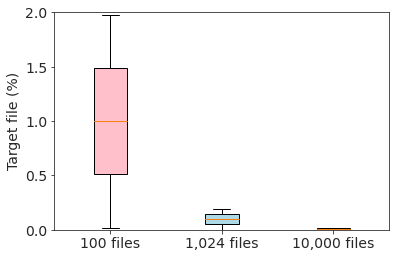

In [138]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_bfPCR_0.flatten(),ra_eff_bfPCR_1.flatten(), ra_eff_bfPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
ax1.set_ylim([0,2.0])
plt.savefig('./fig/fig_different_size_bfPCR_linspace_1Xto1000X.png', dpi=300, bbox_inches='tight', format='png')

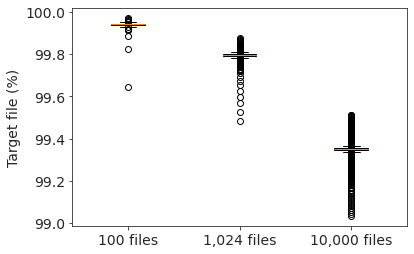

In [139]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_afPCR_0.flatten(),ra_eff_afPCR_1.flatten(), ra_eff_afPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
plt.savefig('./fig/fig_different_size_afPCR_linspace_1Xto1000X.png', dpi=300, bbox_inches='tight', format='png')

In [108]:
x = np.reshape(np.linspace(1,1000, num=10000), (100, 100))

In [109]:
row = 0
col = 0
pool_pcr[row,col] = x[row,col]*(1+amp_efficiency)**cycle


In [110]:
pool_pcr[0,0]

15181.127029874788

In [111]:
np.sum(x)

5005000.0

In [114]:
np.sum(x[:,0])

49555.44554455445